# **Projeto de Retenção de Usuários no Waze**


Sua equipe está progredindo no projeto para desenvolver um modelo de aprendizado de máquina para prever a rotatividade de usuários. Até agora, você concluiu uma proposta de projeto e usou Python para inspecionar e organizar os dados do usuário do Waze.

Você verifica sua caixa de entrada e percebe uma nova mensagem de Chidi Ga, analista de dados sênior de sua equipe. Chidi está satisfeita com o trabalho que você já concluiu e solicita sua ajuda com Análise Exploratória de Dados (EDA) e visualização adicional de dados. Você também nota um e-mail de acompanhamento da Diretora de Análise de Dados, Harriet Hadzic. Harriet sugere incluir um resumo executivo de sua análise para compartilhar com os colegas de equipe.

# **Análise exploratória de dados**

O propósito desta etapa é realizar uma análise exploratória de dados (EDA) no conjunto de dados fornecido.

O objetivo é continuar a análise dos dados que você iniciou na etapa anterior, adicionando visualizações relevantes que ajudem a comunicar a história que os dados contam.

Esta atividade tem 4 partes:

* Parte 1: Importações, links e carregamento

* Parte 2: Exploração de dados

* **Limpeza de dados**

* Parte 3: Construção de visualizações

* Parte 4: Avaliação e compartilhamento de resultados

Siga as instruções e responda à pergunta abaixo. Em seguida, você concluirá um resumo executivo usando as perguntas listadas no [documento de Estratégia PACE](https://docs.google.com/document/d/1iSHdbfQR6w8RClJNWai8oJXn9tQmYoTKn6QohuaK4-s/template/preview?resourcekey=0-ZIHnbxL1dd2u9A47iEVXvg).




# **Visualização com Python**



# **Etapas do PACE**


Ao longo dos notebooks do projeto, você verá referências ao framework de resolução de problemas PACE.




## **PACE: Planejar**






### **Tarefa 1. Importações e carregamento de dados**

Para a EDA dos dados, importe os dados e pacotes que serão mais úteis, como pandas, numpy e matplotlib.




In [ ]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('waze_dataset.csv')



## **PACE: Analisar**

Considere as perguntas para concluir seu código:

1. O dados precisam ser reestruturados ou convertidos em formatos utilizáveis?

Os dados já estão em um formato estruturado. Cada linha representa um usuário.


2. Existem variáveis com dados ausentes?

Sim, há 700 linhas sem "label". Outras variáveis não têm valores ausentes.

### **Tarefa 2. Exploração e limpeza de dados**

Considere as seguintes perguntas:

1. Dado o cenário, quais colunas de dados são mais aplicáveis?

Como estamos interessados na retenção de usuários, a coluna "label" (rótulo) é essencial. Além do rótulo, as variáveis relacionadas ao comportamento do usuário serão as mais aplicáveis. Todas as variáveis estão relacionadas ao comportamento do usuário, exceto o ID.

2. Quais colunas de dados você pode eliminar, sabendo que elas não resolverão seu problema no cenário apresentado?

O ID pode ser excluído da análise, uma vez que não estamos interessados em identificar um usuário específico. O ID não fornece informações significativas sobre a retenção (a menos que o ID seja atribuído com base no tempo de inscrição do usuário).

3. Como você verificaria a presença de dados ausentes? E como lidaria com dados ausentes (se houver)?

Para verificar a presença de dados ausentes, podemos utilizar df.info() e analisar a coluna Non-Null Count. A diferença entre o número de valores não nulos e o número de linhas nos dados representa o número de valores ausentes para a variável.

Se os dados ausentes estiverem completamente ausentes ao acaso (MCAR), o que significa que o motivo para a ausência é independente dos próprios valores dos dados, podemos prosseguir com uma análise de casos completos, removendo as linhas com valores ausentes. Caso contrário, precisamos investigar a causa raiz da ausência e garantir que ela não interfira na inferência estatística e modelagem.

4. Como você identificaria outliers? E como lidaria com outliers (se houver)?

Para identificar outliers, podemos utilizar métodos estatísticos como a regra do IQR (intervalo interquartil) ou visualizações, como boxplots. Uma vez identificados, a abordagem para lidar com outliers depende do contexto. Podemos optar por removê-los se forem resultado de erros ou representarem casos extremamente raros. Alternativamente, podemos transformar os dados ou usar métodos robustos ao outliers durante a modelagem para garantir que eles não influenciem excessivamente os resultados. A decisão específica dependerá da natureza dos dados e dos objetivos da análise.








#### **Visão geral dos dados e resumo estatístico**

Utilize os seguintes métodos e atributos no dataframe:

* `head()`
* `size`
* `describe()`
* `info()`

In [ ]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [ ]:
df.size

194987

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,80.633776,80.699065,0.000000,23.000000,56.000000,112.000000,743.000000
drives,14999.0,67.281152,65.913872,0.000000,20.000000,48.000000,93.000000,596.000000
total_sessions,14999.0,189.964447,136.405128,0.220211,90.661156,159.568115,254.192341,1216.154633
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,4039.340921,2502.149334,60.441250,2212.600607,3493.858085,5289.861262,21183.401890
duration_minutes_drives,14999.0,1860.976012,1446.702288,18.282082,835.996260,1478.249859,2464.362632,15851.727160
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB




## **PACE: Construir**



Considere as seguintes perguntas ao se preparar para lidar com outliers:

1. Quais são algumas maneiras de identificar outliers?

* Utilize funções do numpy para investigar mean() e median() dos dados e compreender a faixa de valores dos dados.
* Utilize um boxplot para visualizar a distribuição dos dados.

2. Como você decide manter ou excluir outliers de futuros modelos?

* Existem três opções principais para lidar com outliers: mantê-los como estão, excluí-los ou reatribuir valores. A decisão de manter outliers, excluí-los ou reatribuir valores é tomada caso a caso, dependendo dos objetivos do modelo que você planeja construir.

Para orientar essa decisão, você pode seguir estas diretrizes gerais:

* Excluir: Se tiver certeza de que os outliers são erros, digitações incorretas ou falhas, e o conjunto de dados será usado para modelagem ou aprendizado de máquina, provavelmente decidirá excluí-los. Destas opções, essa será a menos utilizada.
* Reatribuir: Se o conjunto de dados for pequeno e/ou os dados serão usados para modelagem ou aprendizado de máquina, é mais provável que escolha derivar novos valores para substituir os outliers.
* Manter: Para um conjunto de dados que você planeja explorar ou analisar e nada mais, ou para um conjunto de dados que está sendo preparado para um modelo resistente a outliers, é mais provável que opte por deixá-los.

### **Tarefa 3a. Visualizações**

Selecione tipos de visualizações de dados que o ajudarão a entender e explicar os dados.

Agora que você sabe quais colunas de dados utilizará, é hora de decidir qual visualização de dados faz mais sentido para a Análise Exploratória de Dados (EDA) do conjunto de dados do Waze.

Pergunta: Que tipo(s) de visualização de dados será(ão) mais útil(eis)?

Os box plots serão úteis para identificar outliers e onde a maioria dos pontos de dados reside em termos de viagens, sessões e todas as outras variáveis numéricas contínuas.

Histogramas são essenciais para compreender a distribuição das variáveis.

Gráficos de dispersão serão úteis para visualizar relações entre variáveis.

Gráficos de barras são úteis para comunicar níveis e quantidades, especialmente para informações categóricas.



>Comece examinando a dispersão e distribuição de variáveis importantes usando box plots e histogramas.


#### **`sessions`**

_O número de ocorrências de um usuário abrindo o aplicativo durante o mês._

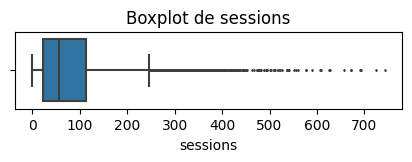

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Boxplot de sessions')

Text(0.5, 1.0, 'Histograma de sessions')

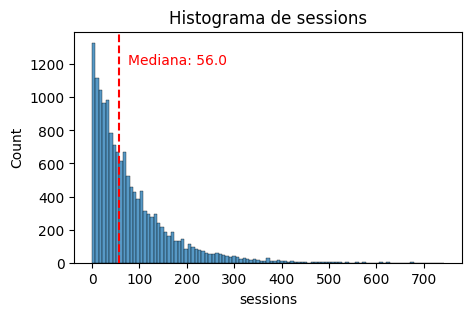

In [ ]:
# Histograma
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, f'Mediana: {median}', color='red')
plt.title('Histograma de sessions')

A variável de `sessions` apresenta uma distribuição assimétrica à direita, com metade das observações tendo 56 acessos ou menos. No entanto, como indicado pelo boxplot, alguns usuários têm mais de 700 acessos.

#### **`drives`**

_Uma ocorrência de dirigir pelo menos 1 km durante o mês._

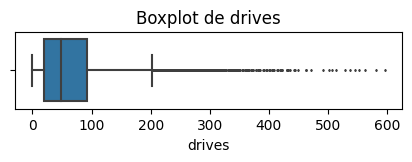

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['drives'], fliersize=1)
plt.title('Boxplot de drives');

À medida que você realiza a Análise Exploratória de Dados (EDA), perceberá que muitas tarefas são repetitivas, como a criação de histogramas para diferentes características. Lembre-se de que, ao se deparar com a cópia/cola frequente de código, vale a pena considerar se uma função poderia tornar seu trabalho mais eficiente. Em alguns casos, pode não valer a pena; em outros, definir uma função pode ser de grande ajuda.

O bloco de código a seguir define uma função que facilita a criação de histogramas com um estilo/formato específico usando este conjunto de dados específico. Não é obrigatório fazer isso, mas, neste caso, pode ser útil.

In [ ]:
# Função auxiliar para plotar histogramas com base no formato do histograma da coluna `sessions`

def histograma(column_str, median_text=True, **kwargs):  # **kwargs = quaisquer argumentos de palavra-chave
                                                           # da função sns.histplot()
    mediana = round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)          # Plota o histograma
    plt.axvline(mediana, color='red', linestyle='--')      # Plota a linha da mediana
    if median_text == True:                                # Adiciona o texto da mediana, a menos que seja definido como False
        ax.text(0.25, 0.85, f'mediana={mediana}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Mediana:', mediana)
    plt.title(f'Histograma de {column_str}')

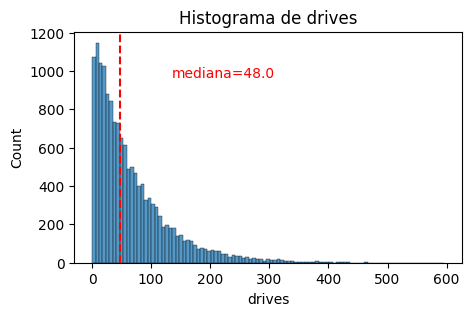

In [ ]:
# Histograma
histograma('drives')

A informação sobre viagens segue uma distribuição semelhante à variável de sessões. É assimétrica à direita, aproximadamente log-normal, com uma mediana de 48. No entanto, alguns motoristas tiveram mais de 400 viagens no último mês.

#### **`total_sessions`**

_Uma estimativa do número total de sessões desde que um usuário começou a usar o aplicativo._

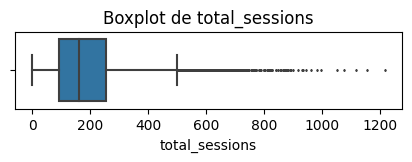

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.title('Boxplot de total_sessions')

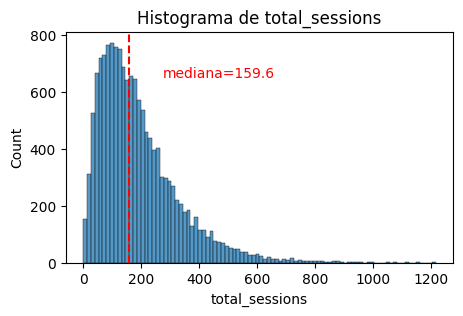

In [ ]:
# Histograma
histograma('total_sessions')

A distribuição de `total_sessions` é assimétrica à direita, com uma mediana de 159,6. Isso é interessante porque, se a mediana do número de sessões no último mês foi 56 e a mediana de `total_sessions` foi ~160, parece que uma grande proporção das (estimadas) viagens totais de um usuário pode ter ocorrido no último mês. Isso é algo que podemos examinar mais de perto posteriormente.

#### **`n_days_after_onboarding`**

_O número de dias desde que um usuário se cadastrou no aplicativo._

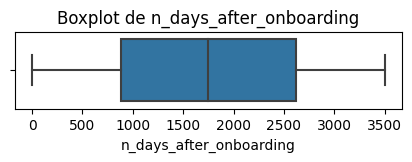

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['n_days_after_onboarding'], fliersize=1)
plt.title('Boxplot de n_days_after_onboarding')

Mediana: 1741.0


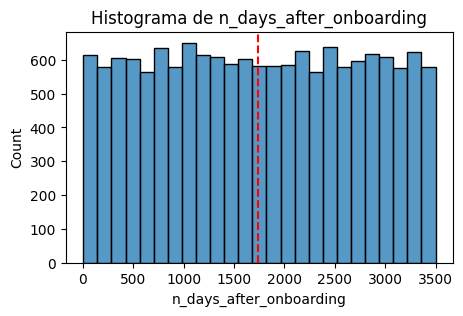

In [ ]:
# Histograma
histograma('n_days_after_onboarding', median_text=False)

O tempo total de adesão do usuário (ou seja, número de dias desde a adesão) é uma distribuição uniforme com valores variando de quase zero a ~ 3.500 (~ 9,5 anos).

#### **`driven_km_drives`**

_Total de quilômetros dirigidos durante o mês._

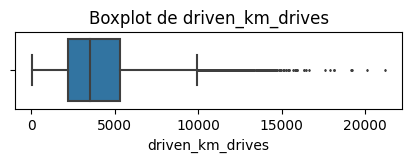

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driven_km_drives'], fliersize=1)
plt.title('Boxplot de driven_km_drives')

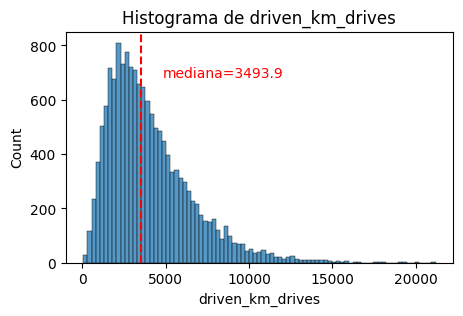

In [ ]:
# Histograma
histograma('driven_km_drives')

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As you discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

O total de quilômetros dirigidos no último mês é uma distribuição assimétrica à direita, com metade dos usuários dirigindo menos de 3.495 km. Como descoberto na análise do curso anterior, os usuários deste conjunto de dados dirigem muito. A maior distância percorrida no mês foi mais da metade da circunferência da Terra.

#### **`duration_minutes_drives`**

_Duração total dirigida em minutos durante o mês._

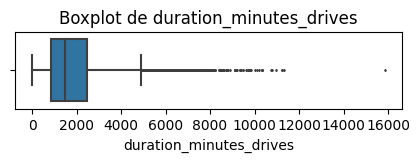

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['duration_minutes_drives'], fliersize=1)
plt.title('Boxplot de duration_minutes_drives')

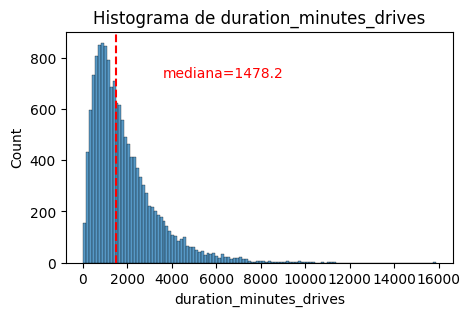

In [ ]:
# Histograma
histograma('duration_minutes_drives')

A variável `duration_minutes_drives` tem uma cauda direita fortemente assimétrica. Metade dos usuários dirigiu menos de ~ 1.478 minutos (~ 25 horas), mas alguns usuários acumularam mais de 250 horas durante o mês.

#### **`activity_days`**

_Número de dias em que o usuário abre o aplicativo durante o mês._

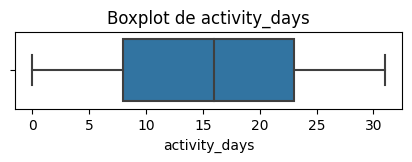

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['activity_days'], fliersize=1)
plt.title('Boxplot de activity_days')

Mediana: 16.0


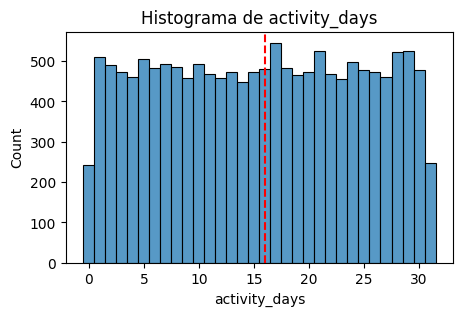

In [ ]:
# Histograma
histograma('activity_days', median_text=False, discrete=True)

No último mês, os usuários abriram o aplicativo uma mediana de 16 vezes. O boxplot revela uma distribuição centralizada. O histograma mostra uma distribuição quase uniforme de ~500 pessoas abrindo o aplicativo em cada contagem de dias. No entanto, há ~250 pessoas que não abriram o aplicativo em nenhum dia e ~250 pessoas que abriram o aplicativo todos os dias do mês.

Esta distribuição é interessante porque não espelha a distribuição de `sessions`, o que poderia ser esperado estar correlacionado com `activity_days`.

#### **`driving_days`**

_Número de dias em que o usuário dirige (pelo menos 1 km) durante o mês._

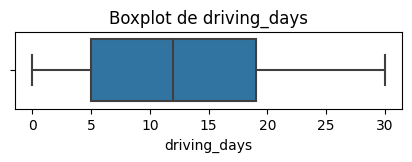

In [ ]:
# Boxplot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['driving_days'], fliersize=1)
plt.title('Boxplot de driving_days')

Mediana: 12.0


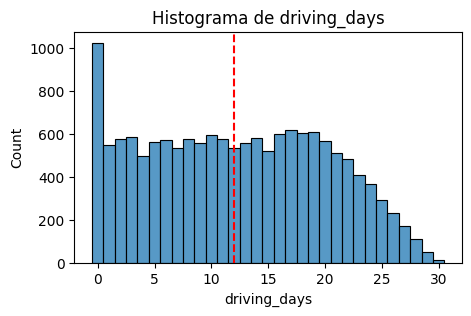

In [ ]:
# Histograma
histograma('driving_days', median_text=False, discrete=True)



O número de dias em que os usuários dirigiram a cada mês é quase uniforme e correlaciona-se amplamente com o número de dias em que abriram o aplicativo nesse mês, exceto que `driving_days` diminui à direita.

No entanto, houve quase o dobro de usuários (~1.000 vs. ~550) que não dirigiram nada durante o mês. Isso pode parecer contraditório quando considerado junto com as informações de `activity_days`. Essa variável teve ~500 usuários abrindo o aplicativo em cada contagem de dias na maioria dos casos, mas houve apenas ~250 usuários que não abriram o aplicativo durante o mês e ~250 usuários que abriram o aplicativo todos os dias. Faça uma marcação para investigação posterior.



#### **`device`**

_O tipo de dispositivo com o qual um usuário inicia uma sessão._

Sendo uma variável categórica, não é plotado um boxplot para ela. Um bom gráfico para uma variável categórica binária é um gráfico de pizza.

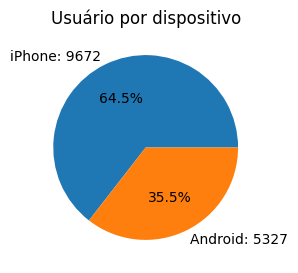

In [ ]:
# Gráfico de Pizza
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Usuário por dispositivo')

Há quase o dobro de usuários de iPhone em comparação com usuários de Android representados nesses dados.

#### **`label`**

_Variável de destino binária ("retido" vs. "churned") para indicar se um usuário abandonou o aplicativo a qualquer momento durante o mês._

Também sendo uma variável categórica, não seria plotado um boxplot. Em vez disso, vamos fazer um gráfico de pizza.

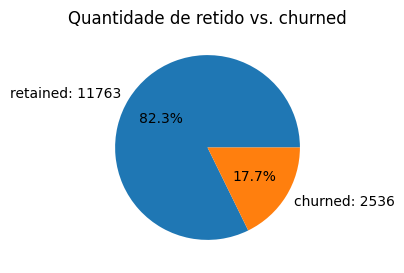

In [ ]:
# Gráfico de Pizza
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Quantidade de retido vs. churned')

Menos de 18% dos usuários abandonaram o aplicativo.

#### **`driving_days` vs. `activity_days`**


Como tanto `driving_days` e `activity_days` representam contagens de dias ao longo de um mês e também estão relacionados, podemos plotá-los juntos em um único histograma. Isso ajudará a compreender melhor como eles se relacionam entre si, evitando a necessidade de voltar em vários pontos do notebook para comparar histogramas em dois lugares diferentes.

Plote um histograma que, para cada dia, tenha uma barra representando as contagens de `driving_days` e `user_days`.

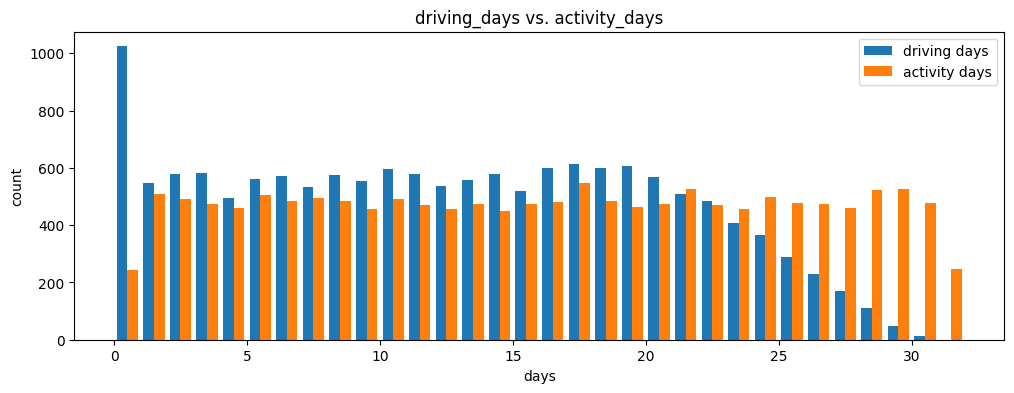

In [ ]:
# Histograma
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days')

Conforme observado anteriormente, isso pode parecer contraditório. Afinal, por que há menos pessoas que não usaram o aplicativo durante o mês e mais pessoas que não dirigiram durante o mês?

Por outro lado, isso pode ser apenas ilustrativo do fato de que, embora essas variáveis estejam relacionadas entre si, elas não são iguais. As pessoas provavelmente abrem o aplicativo mais vezes do que o utilizam para dirigir—talvez para verificar tempos de trajeto ou informações de rota, atualizar configurações ou até mesmo por engano.

No entanto, pode valer a pena entrar em contato com a equipe de dados do Waze para obter mais informações sobre isso, especialmente porque parece que o número de dias no mês não é o mesmo entre as variáveis.

Confirme o número máximo de dias para cada variável — `driving_days` e `activity_days`.

In [ ]:
print(df['driving_days'].max())
print(df['activity_days'].max())

30
31


É verdade. Embora seja possível que nenhum usuário tenha dirigido nos 31 dias do mês, é altamente improvável, considerando que há 15.000 pessoas representadas no conjunto de dados.

Outra maneira de verificar a validade dessas variáveis é criar um gráfico de dispersão simples, com o eixo x representando uma variável e o eixo y representando a outra.

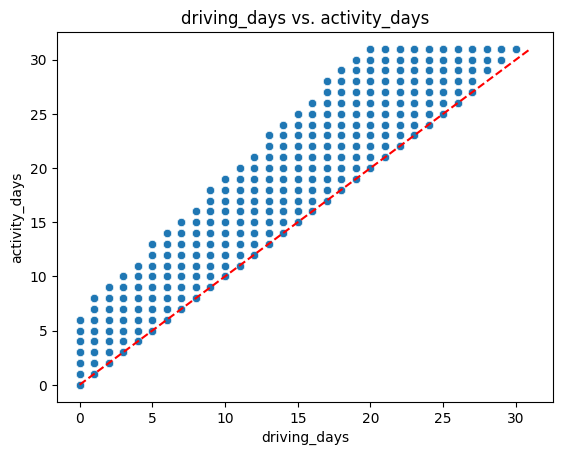

In [ ]:
# Scatter plot
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='red', linestyle='--')

Observe que há um limite teórico. Se você usar o aplicativo para dirigir, então, por definição, isso também deve contar como um dia de uso. Em outras palavras, não é possível ter mais dias de condução do que dias de atividade. Nenhuma das amostras neste conjunto de dados viola essa regra, o que é positivo.

#### **Retention by device**

Elabore um histograma com quatro barras—uma para cada combinação de rótulo de dispositivo—para mostrar quantos usuários de iPhone foram retidos/abandonaram e quantos usuários de Android foram retidos/abandonaram.

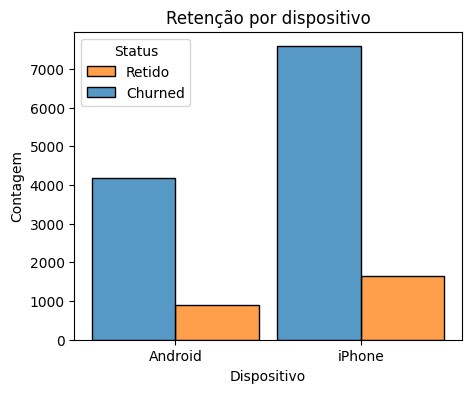

In [ ]:
# Histograma
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )

plt.xlabel('Dispositivo')
plt.ylabel('Contagem')
plt.title('Retenção por dispositivo')
plt.legend(title='Status', labels=['Retido', 'Churned'])


A proporção de usuários que abandonaram em relação aos usuários retidos é consistente entre os tipos de dispositivos.

#### **Retenção por quilômetros percorridos por dia de condução**

No curso anterior, você descobriu que a distância média percorrida por dia de condução no mês passado para usuários que abandonaram foi de 608,78 km, em comparação com 247,48 km para aqueles que não abandonaram. Vamos examinar isso mais detalhadamente.

1. Crie uma nova coluna em `df` chamada `km_per_driving_day`, que representa a média da distância percorrida por dia de condução para cada usuário.

2. Chame o método `describe()` na nova coluna.

In [ ]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

O que você observa? O valor médio é infinito, o desvio padrão é NaN, e o valor máximo é infinito. Por que você acha que isso está acontecendo?

Isso ocorre devido à presença de valores zero na coluna `driving_days`. O Pandas atribui um valor infinito nas linhas correspondentes da nova coluna porque a divisão por zero é indefinida.

1. Converta esses valores de infinito para zero. Você pode usar `np.inf` para se referir a um valor de infinito.

2. Chame `describe()` na coluna `km_per_driving_day` para verificar se funcionou.

In [ ]:
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64



O valor máximo é de 15.420 quilômetros por dia de condução. Isso é fisicamente impossível. Dirigir a 100 km/h por 12 horas totaliza 1.200 km. É improvável que muitas pessoas tenham uma média diária superior a isso ao dirigir, então, por enquanto, desconsidere as linhas em que a distância nesta coluna é superior a 1.200 km.

Elabore um histograma da nova coluna `km_per_driving_day`, desconsiderando aqueles usuários com valores superiores a 1.200 km. Cada barra deve ter o mesmo comprimento e apresentar duas cores, uma cor representando a porcentagem de usuários naquela barra que abandonaram e a outra representando a porcentagem que foram retidos. Isso pode ser feito configurando o parâmetro multiple da função [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) do seaborn para `fill`.

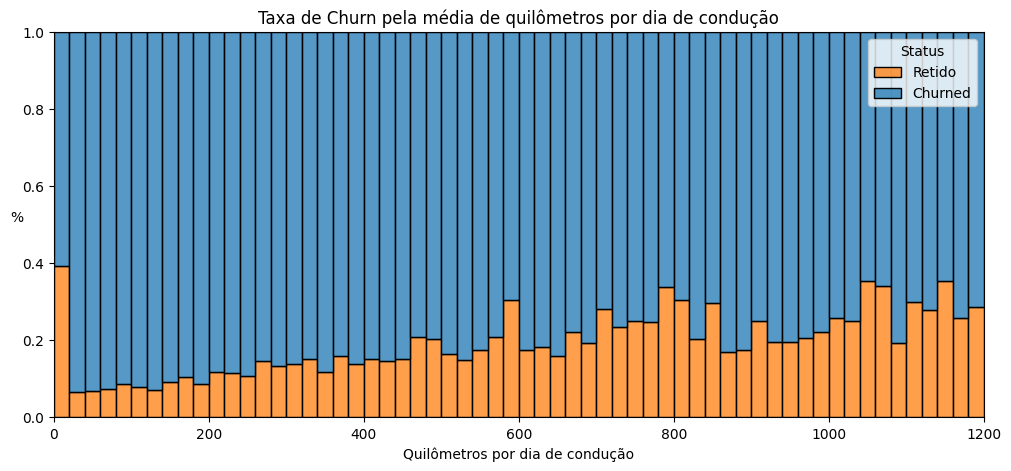

In [ ]:
# Histograma
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.xlabel('Quilômetros por dia de condução')
plt.title('Taxa de Churn pela média de quilômetros por dia de condução')
plt.legend(title='Status', labels=['Retido', 'Churned'])

A taxa de churn tende a aumentar à medida que a média diária de quilômetros percorridos aumenta, confirmando o que foi encontrado no curso anterior. Seria válido investigar mais a fundo as razões pelas quais usuários de longa distância estão deixando de usar o aplicativo.

#### **Taxa de churn por número de dias de condução**

Crie outro histograma semelhante ao anterior, mas desta vez representando a taxa de churn para cada número de dias de condução.

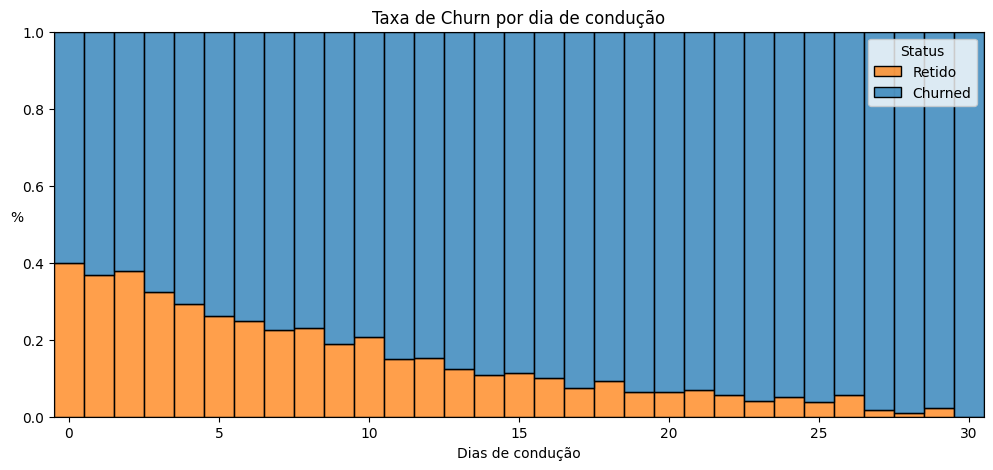

In [ ]:
# Histograma
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.xlabel('Dias de condução')
plt.title('Taxa de Churn por dia de condução')
plt.legend(title='Status', labels=['Retido', 'Churned'])

A taxa de churn é mais alta para pessoas que não usaram muito o Waze durante o último mês. Quanto mais vezes usaram o aplicativo, menos provável era que abandonassem. Enquanto 40% dos usuários que não usaram o aplicativo em nenhum dia do último mês abandonaram, ninguém que usou o aplicativo durante 30 dias abandonou.

Isso não é surpreendente. Se as pessoas que usaram muito o aplicativo abandonassem, isso provavelmente indicaria insatisfação. Quando pessoas que não usam o aplicativo abandonam, pode ser o resultado de insatisfação no passado, ou pode indicar uma menor necessidade de um aplicativo de navegação. Talvez tenham se mudado para uma cidade com bom transporte público e não precisem mais dirigir.

#### **Proporção de sessões ocorridas no último mês**

Crie uma nova coluna `percent_sessions_in_last_month` que represente a porcentagem de todas as sessões totais de cada usuário registradas no último mês de uso.

In [ ]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

Qual a mediana?

In [ ]:
df['percent_sessions_in_last_month'].median()

0.42309702992763176

Mediana: 0.4


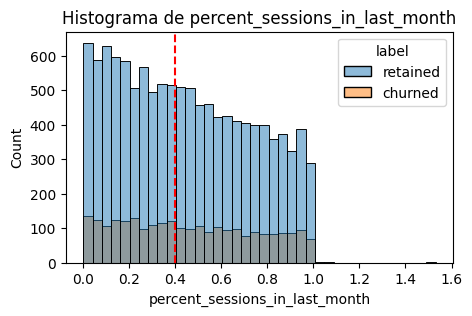

In [ ]:
# Histograma
histograma('percent_sessions_in_last_month',
             hue=df['label'],
             multiple='layer',
             median_text=False)

Mediana de `n_days_after_onboarding`.

In [ ]:
df['n_days_after_onboarding'].median()

1741.0

Metade das pessoas no conjunto de dados teve 40% ou mais de suas sessões apenas no último mês, no entanto, a mediana geral do tempo desde a incorporação é quase cinco anos.

Crie um histograma de `n_days_after_onboarding` apenas para as pessoas que tiveram 40% ou mais de suas sessões totais no último mês.

Text(0.5, 1.0, ' dias após a incorporação para usuários com 40% ou mais de sessões no último mês')

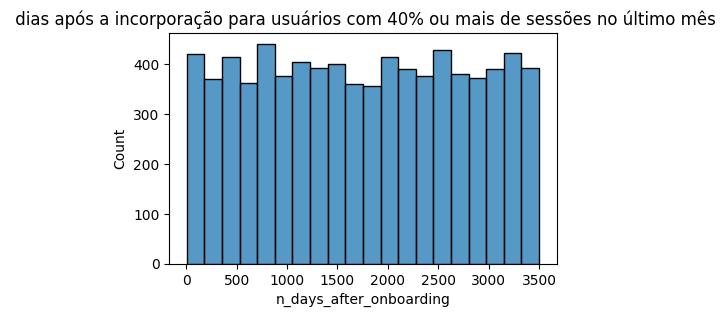

In [ ]:
# Histograma
data = df.loc[df['percent_sessions_in_last_month']>=0.4]
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title(' dias após a incorporação para usuários com 40% ou mais de sessões no último mês')

O número de dias desde a incorporação para usuários com 40% ou mais de suas sessões totais ocorrendo apenas no último mês segue uma distribuição uniforme. Isso é muito estranho. Vale a pena perguntar ao Waze por que tantos usuários de longa data de repente usaram o aplicativo tão intensamente no último mês.

### **Tarefa 3b. Lidando com outliers**

Os boxplots da seção anterior indicaram que muitas dessas variáveis têm outliers. Esses outliers não parecem ser erros de entrada de dados; eles estão presentes devido às distribuições inclinadas para a direita.

Dependendo do que você fará com esses dados, pode ser útil imputar dados atípicos com valores mais razoáveis. Uma maneira de realizar essa imputação é definir um limiar com base em um percentil da distribuição.

Para praticar essa técnica, escreva uma função que calcule o percentil 95 de uma coluna específica e, em seguida, impute valores > ao percentil 95 com o valor no percentil 95 da distribuição.



In [ ]:
def outlier_imputer(column_name, percentile):
    # Calcular o limiar
    threshold = df[column_name].quantile(percentile)
    # Imputar o limiar para valores > que o limiar
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentil: {} | limiar: {}'.format(column_name, percentile, threshold))

Vamos aplicar a função para as variáveis:

* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [ ]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives']:
               outlier_imputer(column, 0.95)

                 sessions | percentil: 0.95 | limiar: 243.0
                   drives | percentil: 0.95 | limiar: 201.0
           total_sessions | percentil: 0.95 | limiar: 454.3632037399997
         driven_km_drives | percentil: 0.95 | limiar: 8889.7942356
  duration_minutes_drives | percentil: 0.95 | limiar: 4668.899348999998


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,14999.0,7499.000000,4329.982679,0.000000,3749.500000,7499.000000,11248.500000,14998.000000
sessions,14999.0,76.568705,67.297958,0.000000,23.000000,56.000000,112.000000,243.000000
drives,14999.0,64.058204,55.306924,0.000000,20.000000,48.000000,93.000000,201.000000
total_sessions,14999.0,184.031320,118.600463,0.220211,90.661156,159.568115,254.192341,454.363204
n_days_after_onboarding,14999.0,1749.837789,1008.513876,4.000000,878.000000,1741.000000,2623.500000,3500.000000
total_navigations_fav1,14999.0,121.605974,148.121544,0.000000,9.000000,71.000000,178.000000,1236.000000
total_navigations_fav2,14999.0,29.672512,45.394651,0.000000,0.000000,9.000000,43.000000,415.000000
driven_km_drives,14999.0,3939.632764,2216.041510,60.441250,2212.600607,3493.858085,5289.861262,8889.794236
duration_minutes_drives,14999.0,1789.647426,1222.705167,18.282082,835.996260,1478.249859,2464.362632,4668.899349
activity_days,14999.0,15.537102,9.004655,0.000000,8.000000,16.000000,23.000000,31.000000


#### **Conclusão**

A análise revelou que a taxa geral de churn é de aproximadamente 17%, e essa taxa é consistente tanto entre usuários de iPhone quanto de Android.

Você pode estar sentindo que quanto mais a fundo explora os dados, mais perguntas surgem. Isso é bastante comum! Neste caso, vale a pena questionar a equipe de dados do Waze sobre por que tantos usuários usaram o aplicativo tão intensamente apenas no último mês.

Além disso, a Análise Exploratória de Dados (EDA) revelou que usuários que percorrem distâncias muito longas em seus dias de condução têm mais probabilidade de abandonar, mas usuários que dirigem com mais frequência têm menos probabilidade de abandonar. A razão para essa discrepância é uma oportunidade para investigação adicional, e seria algo para questionar a equipe de dados do Waze.





## **PACE: Executar**



### **Tarefa 4a. Resultados e avaliação**

Ao criar visualizações em Python, o que você aprendeu sobre o conjunto de dados? Que outras perguntas suas visualizações revelaram que você deve explorar?

Dica profissional: Coloque-se na perspectiva do seu cliente. O que eles gostariam de saber?

Use os campos de código a seguir para realizar qualquer EDA adicional com base nas visualizações que você já criou. Além disso, use o espaço para garantir que suas visualizações sejam claras, facilmente compreensíveis e acessíveis.

Pergunte a si mesmo: Você considerou cor, contraste, ênfase e rotulagem?



* Eu aprendi...

Há dados ausentes no rótulo de churn do usuário, então pode ser necessário um processamento adicional dos dados antes de uma análise mais aprofundada.

Existem muitas observações atípicas para as viagens, então talvez devamos considerar uma transformação variável para estabilizar a variação.

O número de viagens e o número de sessões estão fortemente correlacionados, então eles podem fornecer informações redundantes quando incorporados em um modelo.

Em média, os usuários retidos têm menos viagens do que os usuários que abandonaram.

* Minhas outras perguntas são...

Como surge a ausência de dados no rótulo de churn do usuário?

Quem são os usuários com um número extremamente grande de viagens? Eles são motoristas de transporte compartilhado ou motoristas comerciais?

Por que os usuários retidos têm menos viagens do que os usuários que abandonaram? É porque os usuários que abandonaram têm um histórico mais longo de uso do aplicativo Waze?

Qual é o perfil demográfico dos usuários retidos e dos usuários que abandonaram?

* Meu cliente provavelmente gostaria de saber...

Quais são as variáveis-chave associadas ao churn do usuário?

Podemos implementar políticas para reduzir o churn do usuário?





Use os dois blocos de código seguintes (adicione mais blocos se desejar) para realizar EDA adicional que você considera importante com base no cenário fornecido.

In [ ]:
df['monthly_drives_per_session_ratio'] = (df['drives']/df['sessions'])

In [ ]:
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,monthly_drives_per_session_ratio
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,0.827160
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,0.804511
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,0.833333
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,0.816327
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,0.809524
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone,81.930791,0.404229,0.911504
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone,228.224906,0.012673,0.666667
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone,394.602623,0.221499,0.897436
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android,132.585488,0.310573,0.807018
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone,2014.486765,0.343134,0.809524


### **Tarefa 4b. Conclusão**

Agora que você explorou e visualizou seus dados, o próximo passo é compartilhar suas descobertas com Harriet Hadzic, Diretora de Análise de Dados do Waze. Considere as seguintes perguntas enquanto se prepara para escrever seu resumo executivo. Pense nos pontos-chave que você pode querer compartilhar com a equipe e em que informações são mais relevantes para o projeto de churn de usuários.

**Perguntas:**

1. Que tipos de distribuições você observou nas variáveis? O que isso diz sobre os dados??

> *Quase todas as variáveis eram ou muito inclinadas para a direita ou uniformemente distribuídas. Para as distribuições inclinadas para a direita, isso significa que a maioria dos usuários tinha valores na extremidade inferior da faixa para aquela variável. Para as distribuições uniformes, isso significa que os usuários tinham uma probabilidade geralmente igual de ter valores em qualquer lugar dentro da faixa para aquela variável.*

2. Houve algo que o levou a acreditar que os dados eram errôneos ou problemáticos de alguma forma?

> *A maioria dos dados não foi problemática, e não houve indicação de que alguma variável única estava completamente errada. No entanto, várias variáveis tinham valores atípicos altamente improváveis ou talvez até impossíveis, como `driven_km_drives`. Algumas das variáveis mensais também podem ser problemáticas, como `activity_days` e `driving_days`, porque uma tem um valor máximo de 31 enquanto a outra tem um valor máximo de 30, indicando que a coleta de dados pode não ter ocorrido no mesmo mês para ambas as variáveis.*

3. Sua investigação gerou novas perguntas que você gostaria de explorar ou perguntar à equipe do Waze?

> *Sim. Eu gostaria de perguntar à equipe de dados do Waze se as variáveis mensais foram coletadas durante o mesmo mês, dado o fato de que algumas têm valores máximos de 30 dias, enquanto outras têm 31 dias. Eu também gostaria de saber por que tantos usuários de longa data começaram a usar o aplicativo tão intensamente apenas no último mês. Houve algo que mudou no último mês que poderia motivar esse tipo de comportamento?*

4. Qual a porcentagem de usuários que abandonaram e qual a porcentagem que foram retidos?

> *Menos de 18% dos usuários abandonaram, e ~82% foram retidos.*

5. Quais fatores se correlacionaram com o abandono do usuário? Como?

> *A distância percorrida por dia de condução teve uma correlação positiva com o abandono do usuário. Quanto mais longe um usuário dirigia em cada dia de condução, mais provável era que eles abandonassem. Por outro lado, o número de dias de condução teve uma correlação negativa com o abandono. Usuários que dirigiram mais dias no último mês eram menos propensos a abandonar.*

6. Os usuários mais recentes tiveram uma representação maior neste conjunto de dados do que os usuários com maior tempo de permanência? Como você sabe?

> *Não. Usuários de todas as permanências, desde recém-criados até ~10 anos, estavam relativamente bem representados nos dados. Isso é confirmado pelo histograma para `n_days_after_onboarding`, que revela uma distribuição uniforme para essa variável.*